**#CASO DE ESTUDIO**

En este proyecto, visualizará y realizará cálculos a partir de los datos de los exámenes médicos utilizando
***,matplotlib, seaborn, pandas***. Los valores del conjunto de datos se recogieron durante los exámenes médicos son:

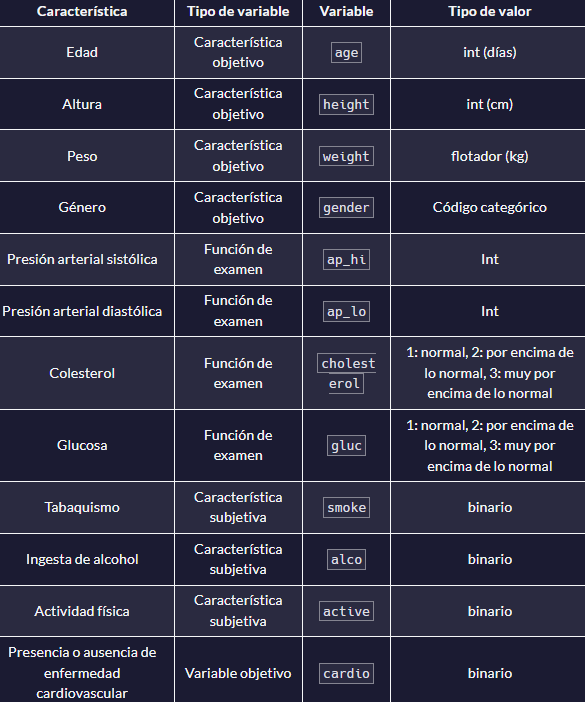

**Se necesita:**

1. Determinar si una persona tiene sobrepeso, primero calcula su IMC.
2. Normaliza los datos haciendo 0 siempre bueno y 1 siempre malo. Si el valor de cholesterol o gluc es 1, haga el valor 0. Si el valor es mayor que 1, ajuste el valor a 1.

**Realizar la visualización de los datos**

3. Crear un dataframe con valores de colesterol, gluc, humo, alco, active y sobrepeso.
4. Realizar limpieza de datos, eliminando los valores atípicos.
5. Mostrar recuento de cada categoría de datos.
6. Convertir el dataframe a formato largo para facilitar la visualización.
7. Guardar el dataframe en el tipo png.
8. Realizar un mapa de calor de las categorías de datos.
9. Teniendo en cuenta que se limpia los datos en la variable df_heat filtrando los siguientes segmentos del paciente que representan datos incorrectos:

    * La presión diastólica es mayor que la sistólica (Mantenga los datos correctos con (df['ap_lo'] <= df['ap_hi'])).
    * La altura es menor que el porcentaje de 2,5 (Mantenga los datos correctos con (df['height'] >= df['height'].quantile(0.025)).
    * La altura es superior al 97.5 por ciento.
    * El peso es inferior al 2.5 por ciento.
    * El peso es mayor al 97.5 por ciento.


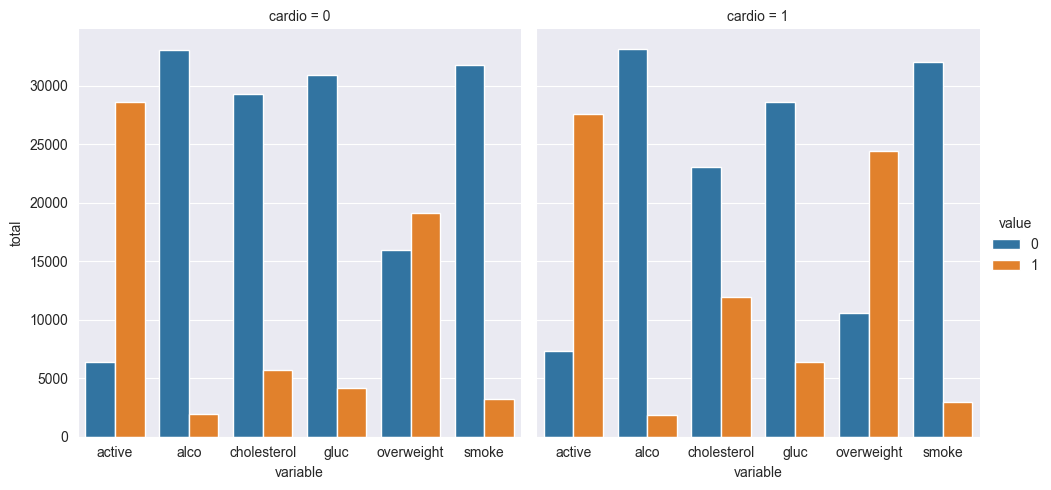

In [24]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('data/medical_examination.csv')
df['overweight'] = (df['weight']/((df['height']/100)**2) > 25).astype(int)
df[['gluc','cholesterol']] = (df[['gluc','cholesterol']] > 1).astype(int)

def draw_cat_plot():
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
    fig  = sns.catplot(data = df_cat, kind='count',  x='variable', hue='value', col='cardio').set(ylabel = 'total').fig
    fig.savefig('images/catplot.png')
    return fig


fig = draw_cat_plot()


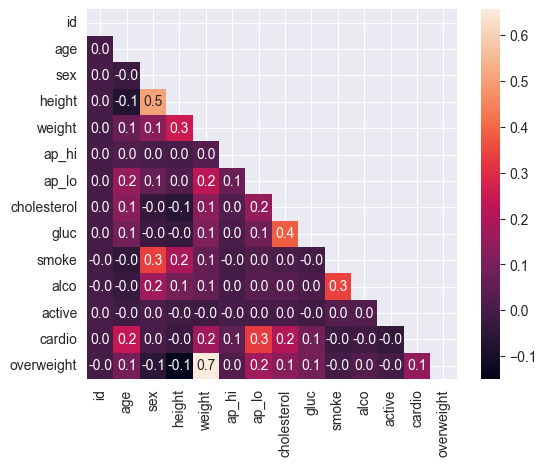

In [26]:
def draw_heat_map():
    df_heat = df[
        ( df['ap_lo'] <= df['ap_hi'] ) &
        ( df['height'] >= df['height'].quantile(0.025) ) &
        ( df['height'] <= df['height'].quantile(0.975) ) &
        ( df['weight'] >= df['weight'].quantile(0.025) ) &
        ( df['weight'] <= df['weight'].quantile(0.975) )
    ]
    corr = df_heat.corr()
    mask = np.triu(corr)
    fig, ax =  plt.subplots()
    ax = sns.heatmap(corr, mask=mask, annot=True, fmt='0.1f', square=True)
    fig.savefig('images/heatmap.png')
    return fig
fig = draw_heat_map()